# Visualize Bayesian Optimization

In [ ]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.stats import norm
from scipy.optimize import minimize

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

# Refer to https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
plt.style.use(['classic'])

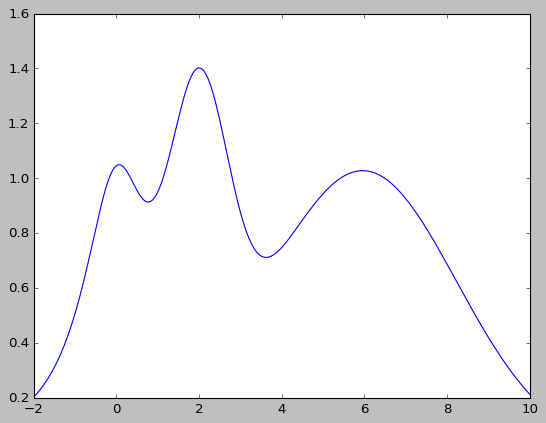

In [84]:
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

x = np.linspace(-2, 10, 10000).reshape(-1, 1)
y = target(x)

plt.plot(x, y)

In [89]:
def plot_gp(x, y, train_features, train_labels):
    
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('Gaussian Process and Utility Function After {} Steps'.format(len(train_features)), fontdict={'size':30})
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    
    xmin, xmax = -2, 10
    gp.fit(train_features, train_labels)
    mu, sigma = gp.predict(x, return_std=True)
    
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(train_features.flatten(), train_labels, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    
    bounds = np.asarray([[-2, 10]])
    
    acquisition_fucntion_kappa = 5
    
    mean, std = gp.predict(x, return_std=True)
    acquisition_fucntion_values = mean + acquisition_fucntion_kappa * std    
    
    acq.plot(x, acquisition_fucntion_values, label='Utility Function', color='purple')
    
    acq.plot(x[np.argmax(acquisition_fucntion_values)], np.max(acquisition_fucntion_values), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(acquisition_fucntion_values) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)


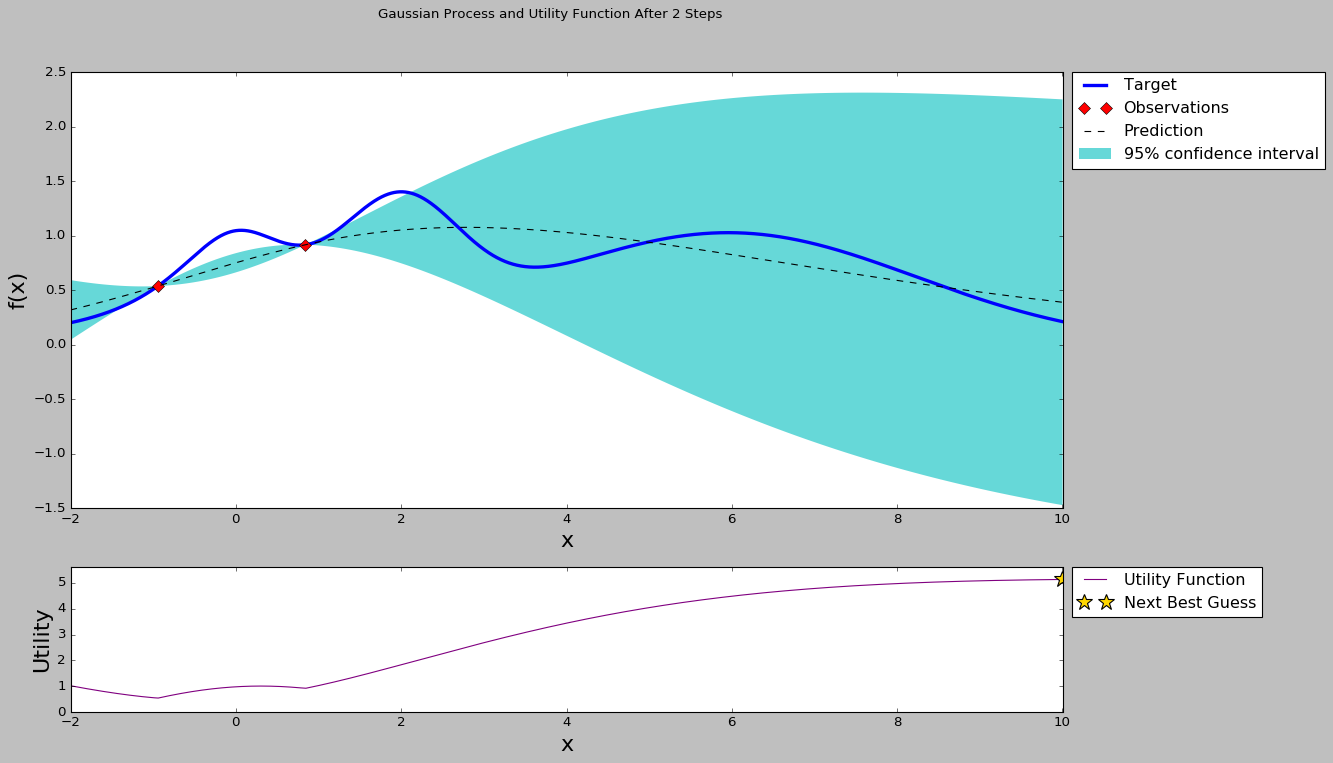

In [91]:
train_features = np.asarray([[ 0.84270083], [-0.94224809]])
train_labels = np.asarray([ 0.9167281 ,  0.53795322])
plot_gp(x, y, train_features, train_labels)

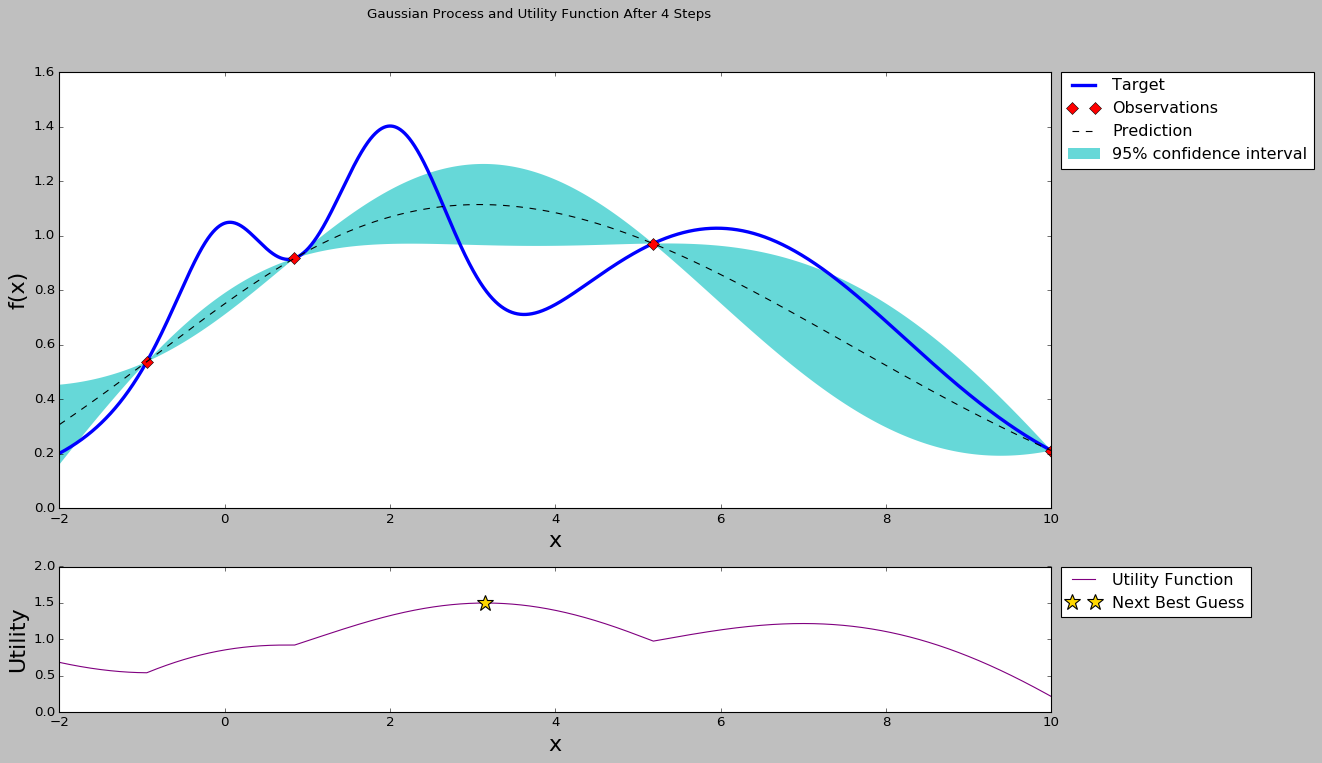

In [93]:
train_features = np.asarray([[ 0.84270083], [-0.94224809], [10.0], [5.18083444]])
train_labels = np.asarray([ 0.9167281, 0.53795322, 0.21179751, 0.97105722])
plot_gp(x, y, train_features, train_labels)


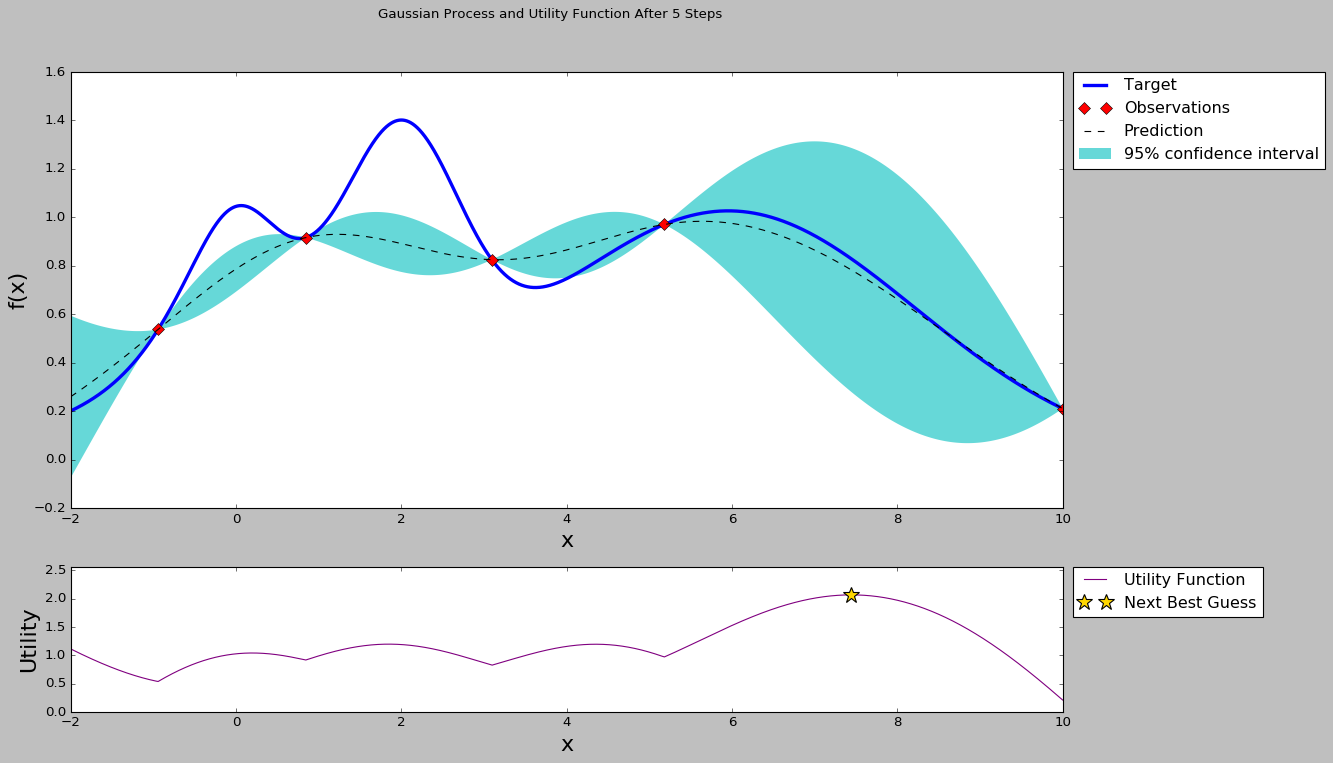

In [94]:
train_features = np.asarray([[ 0.84270083], [-0.94224809], [10.0], [5.18083444], [3.09533802]])
train_labels = np.asarray([ 0.9167281, 0.53795322, 0.21179751, 0.97105722, 0.82588638])
plot_gp(x, y, train_features, train_labels)

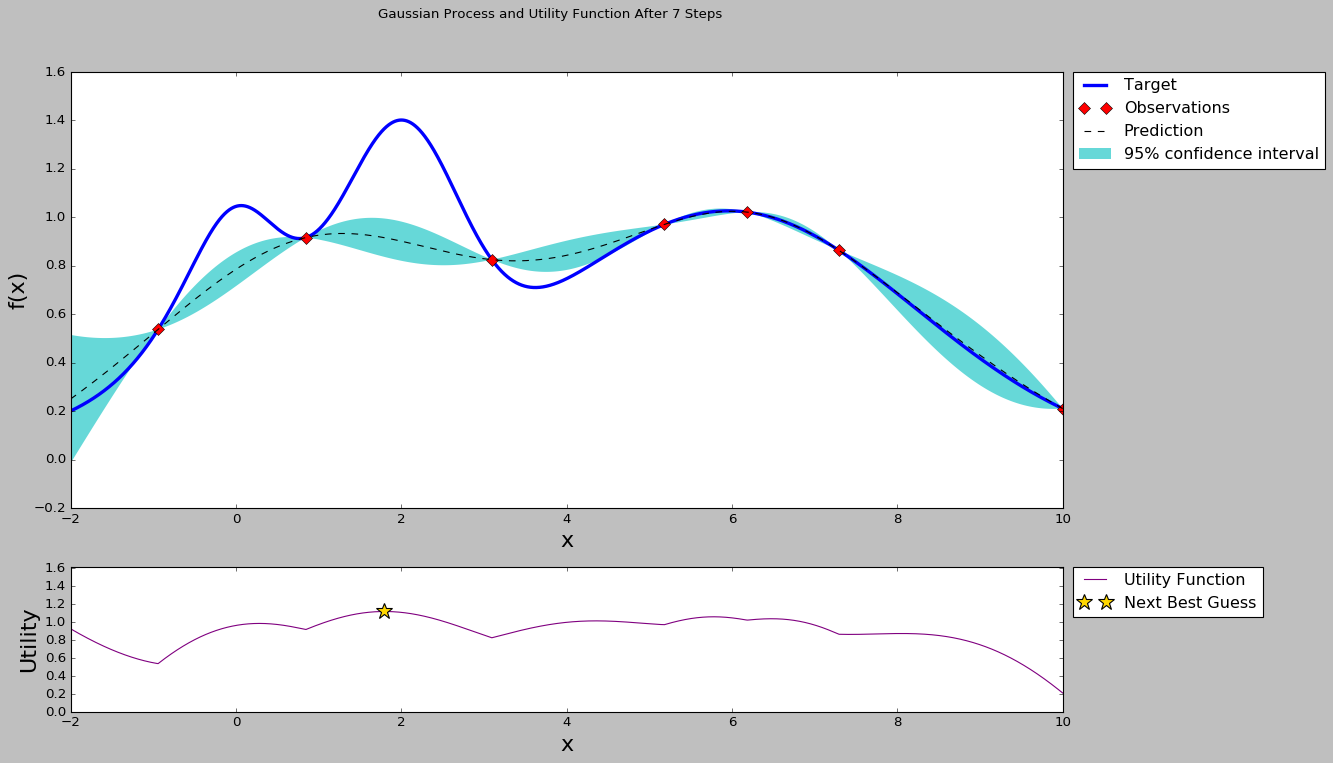

In [95]:
train_features = np.asarray([[ 0.84270083], [-0.94224809], [10.0], [5.18083444], [3.09533802], [7.2911982], [6.18382216]])
train_labels = np.asarray([ 0.9167281, 0.53795322, 0.21179751, 0.97105722, 0.82588638, 0.86490047, 1.02211109])
plot_gp(x, y, train_features, train_labels)

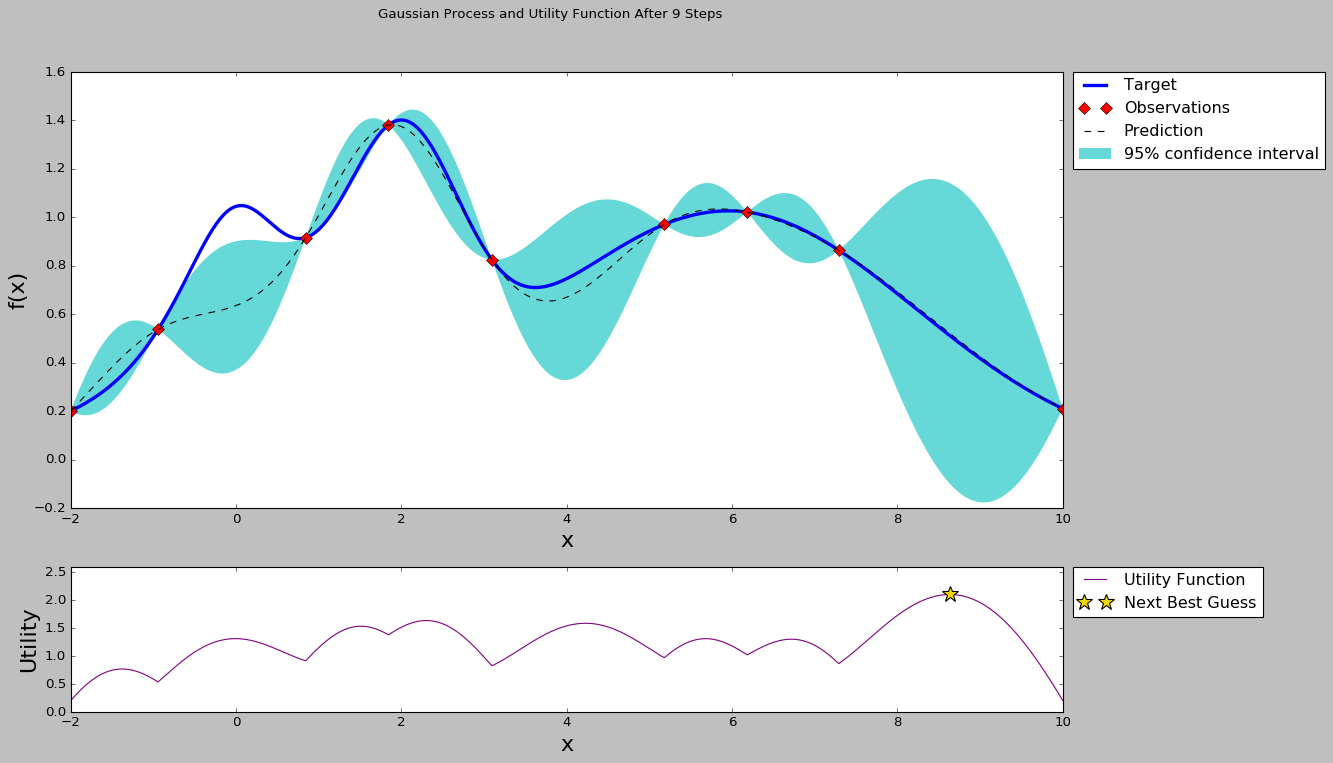

In [96]:
train_features = np.asarray([[ 0.84270083], [-0.94224809], [10.0], [5.18083444], [3.09533802], [7.2911982], [6.18382216], [1.84510145], [-2.0]])
train_labels = np.asarray([ 0.9167281, 0.53795322, 0.21179751, 0.97105722, 0.82588638, 0.86490047, 1.02211109, 1.38127605, 0.20166167])
plot_gp(x, y, train_features, train_labels)

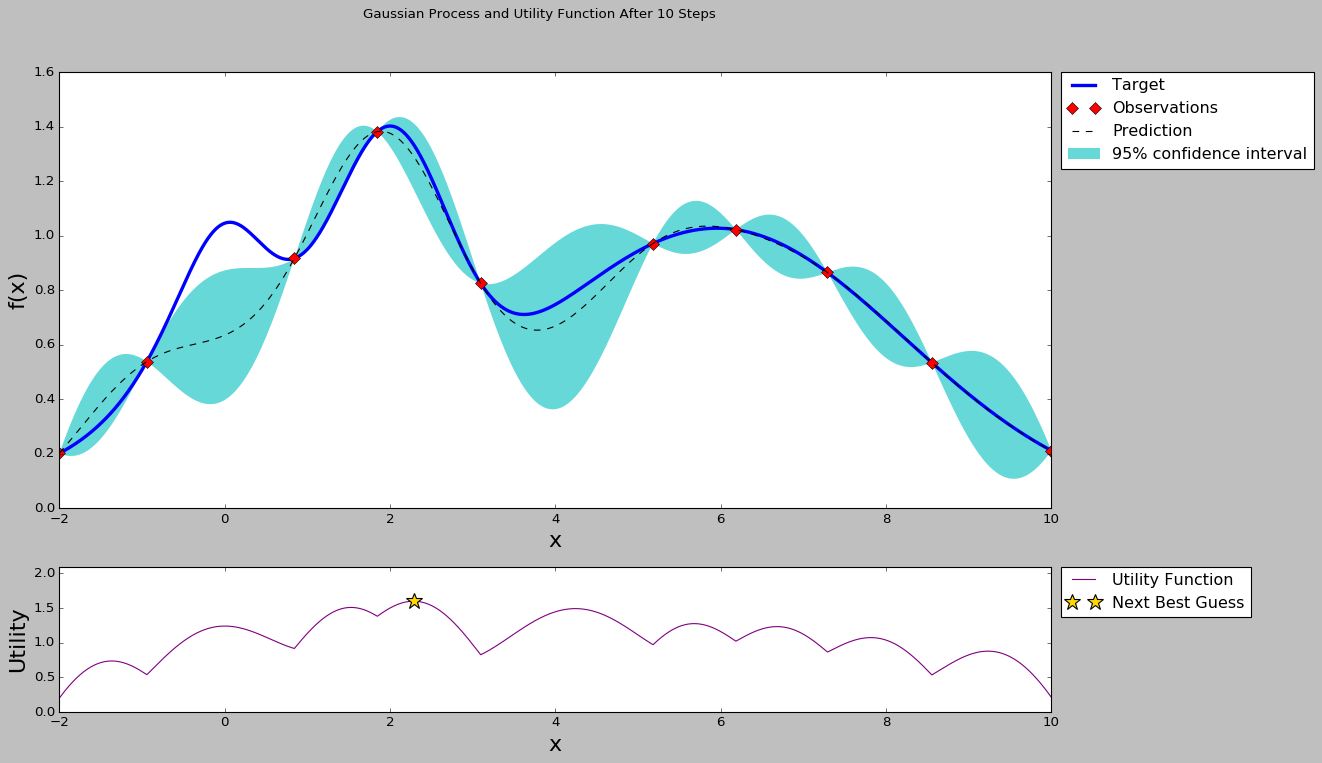

In [97]:
train_features = np.asarray([[ 0.84270083], [-0.94224809], [10.0], [5.18083444], [3.09533802], [7.2911982], [6.18382216], [1.84510145], [-2.0], [8.55378729]])
train_labels = np.asarray([ 0.9167281, 0.53795322, 0.21179751, 0.97105722, 0.82588638, 0.86490047, 1.02211109, 1.38127605, 0.20166167, 0.53439045])
plot_gp(x, y, train_features, train_labels)